<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Machine Learning Engineering Onramp</h1>
# <h2 align="center" id="heading">MLE Basic Toolkit 🧰</h2>


## 📚 Learning Objectives

In this notebook, you will learn the basics of some of the most widely used libraries in Python for Machine Learning:
* `pandas` - for data manipulation and exploratory data analysis,
* `scikit-learn` aka `sklearn` - for predictive data analysis and machine learning
* `matplotlib` and `seaborn` - for data visualization

## Pandas 🐼

[Pandas](https://pandas.pydata.org/) is a powerful, versatile and easy-to-use tool for data mannipulation and data analysis and is the ML Engineer's Swiss Army knife for tabular data.

### Let's start off by creating a DataFrame from scratch!

A `DataFrame` is a data structure that is used to organize data into a 2-dimensional table of rows and columns.  You can think of a DataFrame as a spreadsheet or SQL table.

First we'll import `pandas` using the conventional abbreviation `pd`, which will not only save us some keystrokes, but also make our code less verbose.  While we can abbreviate any package with any notation, it is best to follow the conventions set by the authors of the package.  

In [1]:
import pandas as pd

Now let's create a DataFrame using the following steps:
1. Create a couple of lists
2. Create a dictionary mapping for those lists
3. Create a DataFrame

In [2]:
names = ["Greg", "Sina", "Milica", "Chris", "Michael"]
nums = [1, 2, 3, 4, 5]

data = {"names":names, "nums":nums}

df = pd.DataFrame(data)

print(df)

     names  nums
0     Greg     1
1     Sina     2
2   Milica     3
3    Chris     4
4  Michael     5


We can also easily add data by creating new rows or columns.

In [3]:
# Add a new column for roles
roles = ["Head of Product", "Instructor", "Instructor", "Instructor", "Instructor"]
df["roles"] = roles

# Append a new row using a list
df.loc[len(df)] = ["Ali", 6, "Instructor"] 
print(df)

     names  nums            roles
0     Greg     1  Head of Product
1     Sina     2       Instructor
2   Milica     3       Instructor
3    Chris     4       Instructor
4  Michael     5       Instructor
5      Ali     6       Instructor


In [4]:
# Append a new row using a pd.Series
new = ["Bruno", 7, "Instructor"]
df = df.append(pd.Series(new, index=df.columns[:len(new)]), ignore_index=True)
print(df)

     names  nums            roles
0     Greg     1  Head of Product
1     Sina     2       Instructor
2   Milica     3       Instructor
3    Chris     4       Instructor
4  Michael     5       Instructor
5      Ali     6       Instructor
6    Bruno     7       Instructor


/var/folders/lc/0q_5vmf5385c78mr7v2ntch00000gn/T/ipykernel_69821/2079375105.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new, index=df.columns[:len(new)]), ignore_index=True)


What happens if we specify an index that already exists in the DataFrame?

In [5]:
df.loc[6] = ["Milan", 8, "Instructor"] 
df

,names,nums,roles
0,Greg,1,Head of Product
1,Sina,2,Instructor
2,Milica,3,Instructor
3,Chris,4,Instructor
4,Michael,5,Instructor
5,Ali,6,Instructor
6,Milan,8,Instructor


Ooops, we have overwritten Bruno!  Let's add him back, but this time let's use an insert.  There isn't a great way to do this in Pandas, but we can also use `numpy` to help us out with this!

In [6]:
import numpy as np

df = pd.DataFrame(np.insert(df.values, 6, values=["Bruno", 7, "Instructor"], axis=0), columns=df.columns)
df

,names,nums,roles
0,Greg,1,Head of Product
1,Sina,2,Instructor
2,Milica,3,Instructor
3,Chris,4,Instructor
4,Michael,5,Instructor
5,Ali,6,Instructor
6,Bruno,7,Instructor
7,Milan,8,Instructor


## Diving Deeper 🤿 
Now that we can create our own DataFrame from scratch, let's take another dataset and clean it up and analyze it!  We will load the [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) that comes in pre-loaded in `sklearn`.  `Sklearn` comes preloaded with several [datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) and are great for practicing data exploration and ML techniques!

In [7]:
from sklearn.datasets import load_diabetes
dfX, Y = load_diabetes(return_X_y=True, as_frame=True)

dfX

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In this dataset, we are given 10 variables of interest to predict diabetes progression after one year.  Notice that columns 5-10 are not given meaningful names, let's rename this columns using a dictionary mapping.

In [8]:
cols = {"s1":"tc", "s2":"ldl", "s3":"hdl", "s4":"tch", "s5":"ltg", "s6":"glu"}
dfX = dfX.rename(columns=cols)
dfX

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Though, our X values are returned to us as a DataFrame, our Y values are returned as a Pandas series ([pd.series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)).  Let's create a DataFrame for it as well!

In [9]:
dfY = pd.DataFrame({"disease_progression": Y})
dfY

,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


## Exploratory Data Analysis 🗺️ 🧭 ⛏️
Now let's begin exploring the data!  We can call the `shape` function in Pandas to learn the dimensions our DataFrames.  

In [163]:
print(dfX.shape)

(442, 10)


We can see that our DataFrames contain 442 rows and 10 columns.  Let's make sure that our `dfY` DataFrame.  Give a try in the cell below!

In [10]:
print(dfY.shape)

(442, 1)


Now that we know that our DataFrames are the same length, let's add the dependent variable (Y) DataFrame to our DataFrame with our independent variables (X).  

We can also use the `head` function to return the first rows of the DataFrame.  This allows us to peek 👀 the data, rather than return the whole DataFrame which can be helpful for large datasets.

In [11]:
dfX["disease_prog"] = dfY
dfX.head(5)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's see if we have any null values that we need to deal with.

In [12]:
dfX.isnull().sum()


age             0
sex             0
bmi             0
bp              0
tc              0
ldl             0
hdl             0
tch             0
ltg             0
glu             0
disease_prog    0
dtype: int64

It doesn't look like we have any nulls to deal with.  Let's use the `describe` function to give us some descriptive statistics about the dataset! 

In [13]:
dfX.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## 📈 Visualize the Data

Let's visualize the data with the help of [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) libraries.  `Matplotlib` is a comprehensize data visualization library and can be used for customized static, as well as dynamic and interactive plots.  `Seaborn` is a high-level library for common statistical visualizations that runs `matplotlib` under the hood.

<Figure size 1000x700 with 0 Axes>

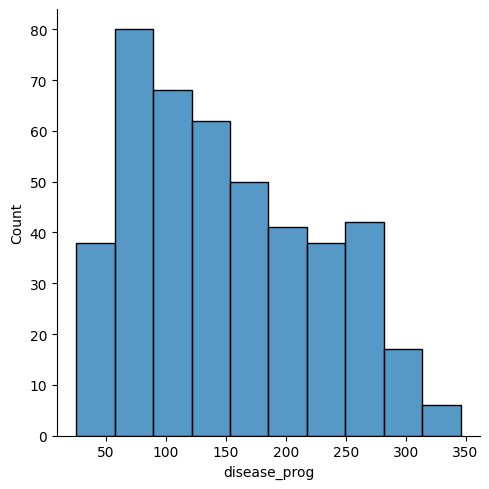

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#figure size
plt.figure(figsize=(10, 7))

sns.displot(dfX["disease_prog"])

Let's also have a look at the correlations among our variables using a heatmap.

<AxesSubplot: >

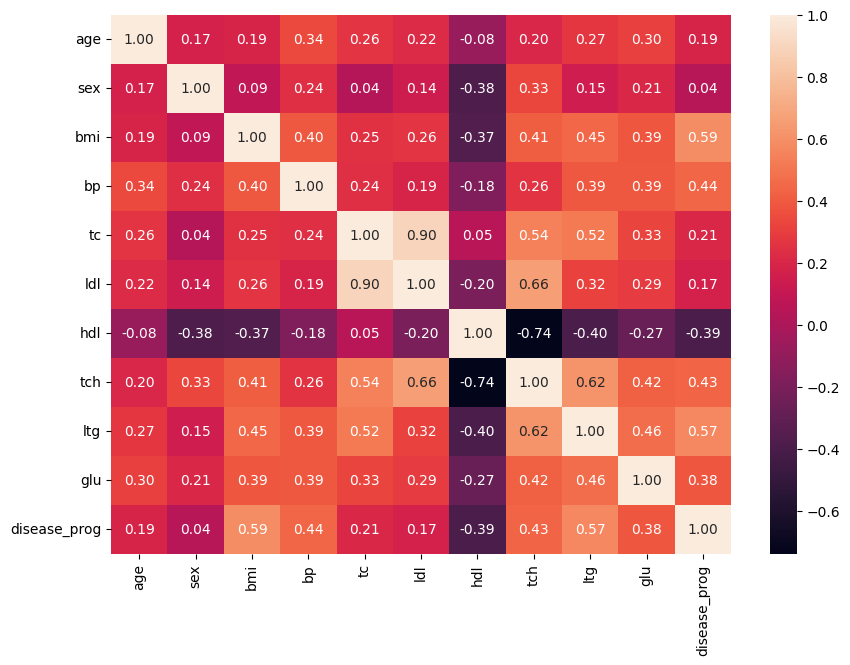

In [15]:
corr = dfX.corr()

#figure size
plt.figure(figsize=(10, 7))

sns.heatmap(dfX.corr(), annot=True, fmt='.2f')

Since half of the data in the heatmap above is redundant, we can mask the upper triangle using a mask, which gives us a cleaner, less busy, correlogram.

<AxesSubplot: >

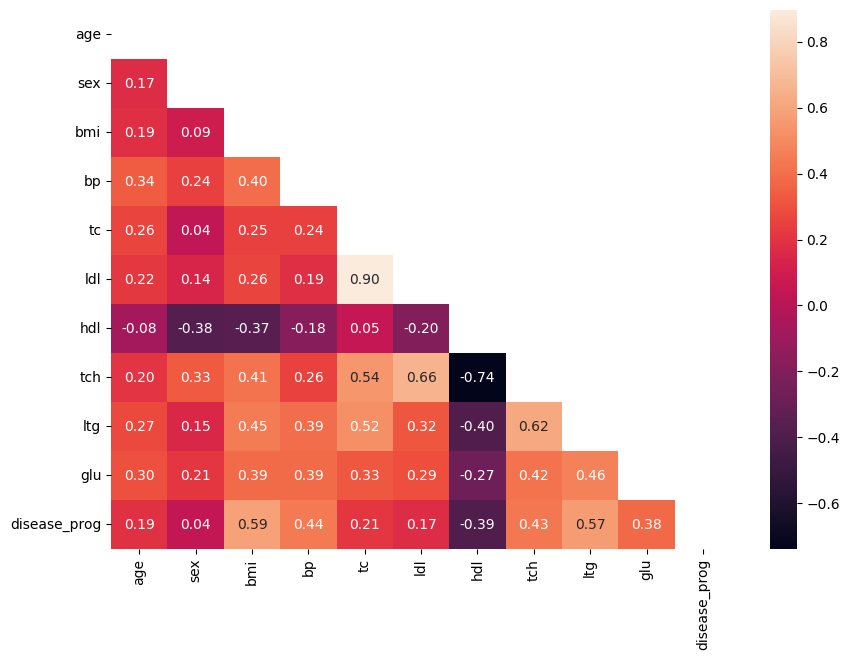

In [16]:
#figure size
plt.figure(figsize=(10, 7))

mask = np.triu(np.ones_like(dfX.corr()))
sns.heatmap(dfX.corr(), mask=mask, annot=True, fmt='.2f')

We see that there is a moderate correlation between `disease_prog` and `ltg` (0.57) and `bmi` (0.59).  It is also worth noting that there is a strong correlation between `ldl` and `tc` (0.9).

Let's see if we can note any relationship between these variables by looking at some pair plots.

<Figure size 1000x700 with 0 Axes>

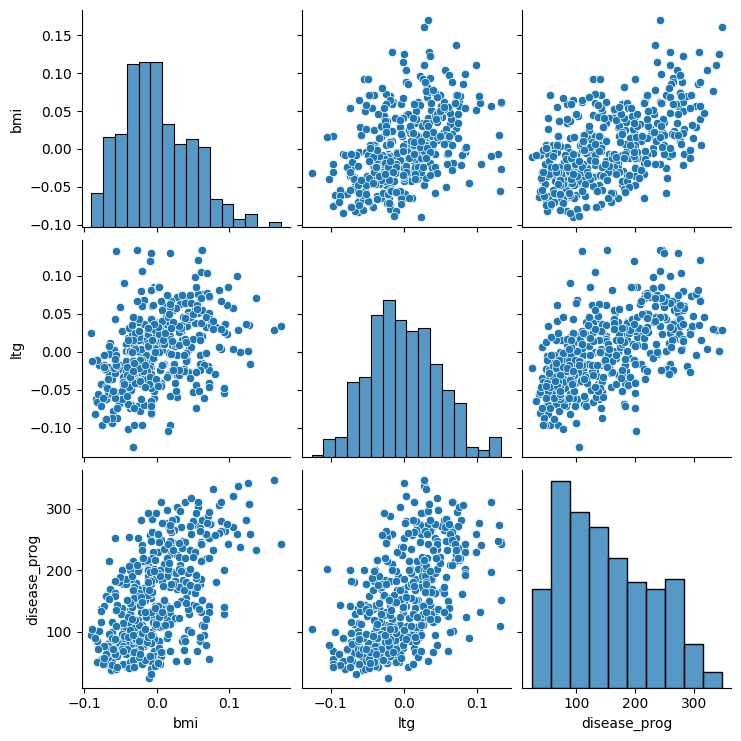

In [17]:
#figure size
plt.figure(figsize=(10, 7))

#plotting graphs
sns.pairplot(dfX[["bmi", "ltg", "disease_prog"]])

The relationships above look approximately linear.  We can also plot a regression plot to evaluate the linear relationship a more closely.


Text(0, 0.5, 'Disease Progression')

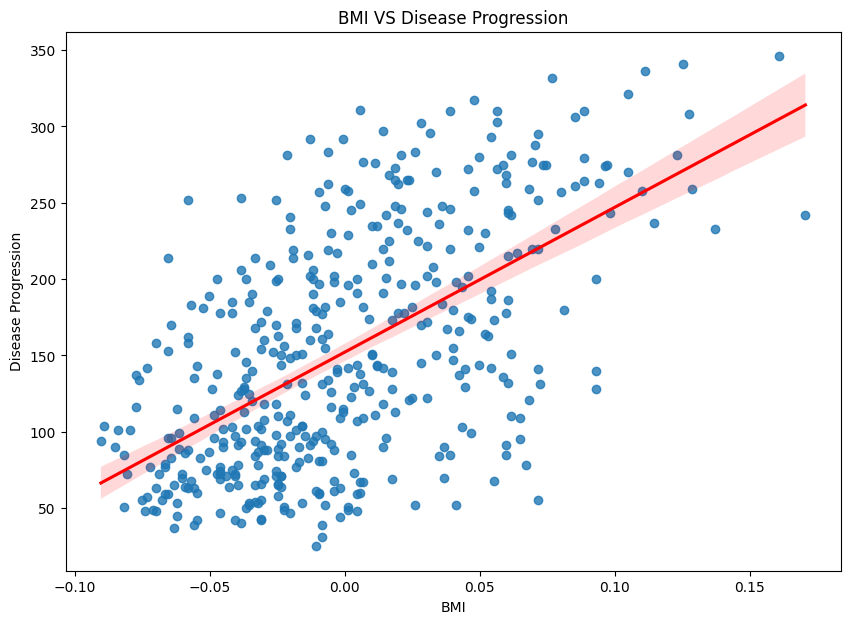

In [18]:
plt.figure(figsize=(10, 7))

#regression between bmi and progression
sns.regplot(data=dfX, x="bmi", y="disease_prog",line_kws={"color": "red"})

#labeling
plt.title("BMI VS Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")

Text(0, 0.5, 'Disease Progression')

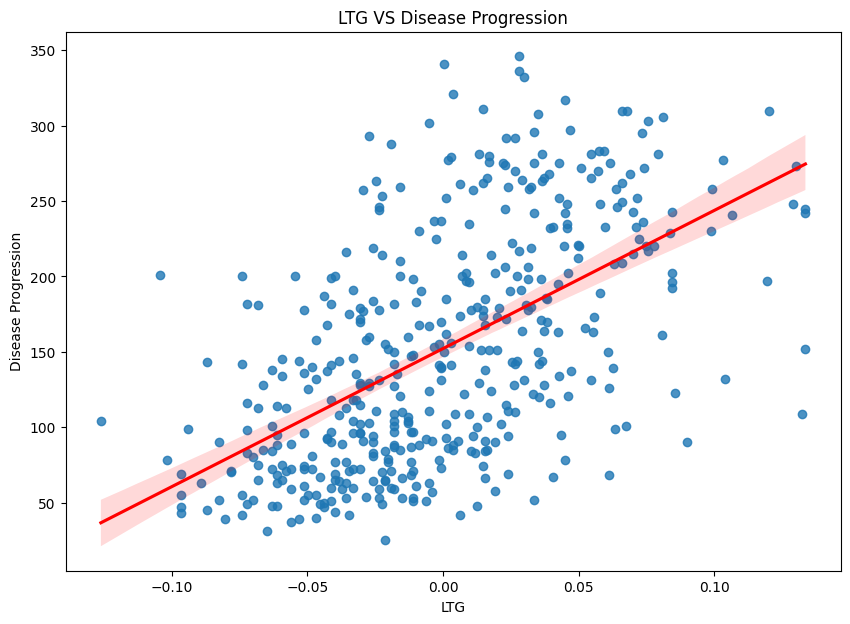

In [19]:
# Set the figure size
plt.figure(figsize=(10, 7))

#regression between bmi and progression
sns.regplot(data=dfX, x="ltg", y="disease_prog",line_kws={"color": "red"})

#labeling
plt.title("LTG VS Disease Progression")
plt.xlabel("LTG")
plt.ylabel("Disease Progression")

While there does appear to be a linear relationship between both `bmi` and `ltg` and `disease_prog`, there is a lot of dispersion as well, but this also make sense since we only had a moderate correlations.

Let's drop our Y value, `disease_prog`, from the DataFrame so that we can perform a regression analysis using sklearn!

In [20]:
dfX = dfX.drop(["disease_prog"], axis=1)
dfX

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


## Split the data ➗

Now let's split our dataset into `train` and `test` datasets - this will allow our model to learn from the `train` data and we can evaluate the performance of the model on the `test` data that it hasn't seen before.  Since this is a small dataset, we will use 90% of the data for training and 10% for testing.  We will also set a `random_state` for reproducibility!

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(dfX, dfY, test_size=0.1,random_state=42)

## Making Predictions 🔮 

Now we can fit the data to the model by calling the `fit` (dot-fit) function.

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

## Evaluate the Model 📏 

Now we can fit the model with the data, make some predictions and evaluate our model using the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R^2 aka R-squared).  This will tell us how much of the variance of the data can be explained by the model.

In [24]:
#intercept
print(f"the intercept is:{lr.intercept_[0]: .2f}")

#slopes
print(f"the slopes are:{lr.coef_}")

#Score model using R^2
print(f"R2 on train set:{lr.score(X_train, y_train): .2f}") #train set
print(f"R2 on test set:{lr.score(X_test, y_test): .2f}") #test set

the intercept is: 151.72
the slopes are:[[  19.92730105 -262.5526422   509.19584695  336.09319329 -849.30479304
   480.22664735  120.69064852  236.72228404  716.61278802   70.41001991]]
R2 on train set: 0.51
R2 on test set: 0.55


The R2 is only around 0.5, which demonstrates a moderate fit. While this might seem low, it can be perfectly acceptable in some cases. This result is not totally unexpected as we only had moderate correlations between our independent and dependent variables.  

## Conclusions 🧑‍🏫 

In this exercise, we went through many of the basic functions of `pandas`, performed an exploratory data analysis (EDA), made data visualizations using `matplotlib` and `seaborn` and went through the ML worflow in `sklearn`.  Now that we have covered many of the basics of some of the core packages that we will be using in this course, you've got a firm foundation to build on!